# Laboratorium 06
## Kwadratury
Iga Antonik, Helena Szczepanowska

# Zadanie 1
Wiadomo, że 
$$\int\limits_{0}^{1} \frac{4}{1+x^2} = π$$
Powyższą równość można wykorzystać do obliczenia przybliżonej wartości π poprzez całkowanie numeryczne.
- (a) Oblicz wartość powyższej całki, korzystając ze złożonych kwadratur otwatej prostokątów (ang. mid-point rule), trapezów i Simpsona. Można wykorzystać funkcje integrate.trapz i integrate.simps z biblioteki scipy. Na przedziale całkowania rozmieść 2m+1 równoodległych węzłów. W kolejnych
próbach m wzrasta o 1, tzn. między każde dwa sąsiednie węzły dodawany jest nowy węzeł, a ich zagęszczenie zwiększa się dwukrotnie. Przyjmij zakres
wartości m od 1 do 25. Dla każdej metody narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, n + 1 (gdzie n = 1/h, z krokiem h). Wyniki przedstaw na wspólnym wykresie, używając skali logarytmicznej na obu osiach.

- (b) Czy istnieje pewna wartość, poniżej której zmniejszanie kroku h nie zmniejsza już błędu kwadratury? Porównaj wartość hmin, odpowiadającą minimum wartości bezwzględnej błędu względnego, z wartością wyznaczoną w laboratorium 1.

- (c) Dla każdej z użytych metod porównaj empiryczny rząd zbieżności z rząd zbieżności przewidywanym przez teorię. Aby wyniki miały sens, do obliczenia rzędu empirycznego użyj wartości h z zakresu, w którym błąd metody przeważa nad błędem numerycznym

## Rozwiązanie
### Biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps

### Definicja funkcji podcałkowej

In [2]:
def f(x):
    return 4 / (1 + x**2)

### Funkcja obliczająca wartość błędu względnego

In [3]:
def relative_error(exact, approx):
    return np.abs((exact - approx) / exact)

### Obliczanie wartości całek i błędów dla różnych wartości m

In [4]:
# Zakres wartości m
m_values = np.arange(1, 26)

# Listy przechowujące błędy dla każdej metody
errors_trapezoidal = []
errors_simpson = []
errors_midpoint = []

for m in m_values:
    n = 2 ** m + 1
    x = np.linspace(0, 1, n)
    y = f(x)
    
    # Metoda trapezów
    integral_trapezoidal = trapz(y, x)
    error_trapezoidal = relative_error(np.pi, integral_trapezoidal)
    errors_trapezoidal.append(error_trapezoidal)
    
    # Metoda Simpsona
    integral_simpson = simps(y, x)
    error_simpson = relative_error(np.pi, integral_simpson)
    errors_simpson.append(error_simpson)
    
    # Metoda punktu środkowego
    x_mid = (x[1:] + x[:-1]) / 2
    y_mid = f(x_mid)
    integral_midpoint = np.sum(y_mid * (x[1:] - x[:-1]))
    error_midpoint = relative_error(np.pi, integral_midpoint)
    errors_midpoint.append(error_midpoint)

/var/folders/gs/0r96rlpd3_1fydcvq1jtfmdh0000gn/T/ipykernel_45191/1199239671.py:15: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integral_trapezoidal = trapz(y, x)
/var/folders/gs/0r96rlpd3_1fydcvq1jtfmdh0000gn/T/ipykernel_45191/1199239671.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_simpson = simps(y, x)


## Wykres

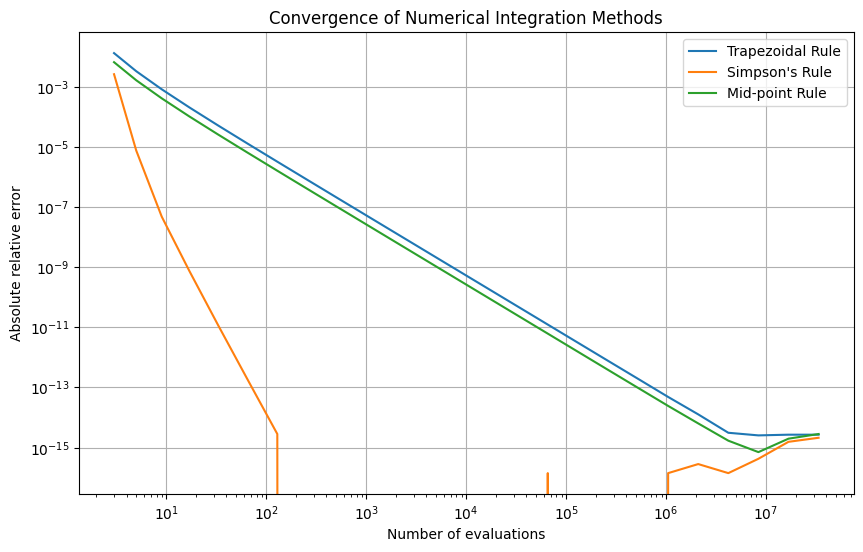

In [5]:
n_values = 2**m_values +1

plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_trapezoidal, label='Trapezoidal Rule')
plt.plot(n_values, errors_simpson, label='Simpson\'s Rule')
plt.plot(n_values, errors_midpoint, label='Mid-point Rule')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of evaluations')
plt.ylabel('Absolute relative error')
plt.title('Convergence of Numerical Integration Methods')
plt.legend()
plt.grid(True)
plt.show()

### Obliczenie h_{min}

In [6]:
def calculate_hmin(method):
    h = 1.0
    previous_error = 1.0

    while True:
        x = np.linspace(0, 1, int(1 / h) + 1)
        y = f(x)

        exact_value = np.pi
        integral_value = method(y, x)
        error = relative_error(exact_value, integral_value)

        if error >= previous_error or np.isnan(error):
            break

        previous_error = error
        h /= 2

    return h

h_min_trapezoidal = calculate_hmin(trapz)
print("H_min dla metody trapezow wynosi:",h_min_trapezoidal)
h_min_Simpson = calculate_hmin(simps)
print("H_min dla metody Simpsona wynosi:",h_min_Simpson)

/var/folders/gs/0r96rlpd3_1fydcvq1jtfmdh0000gn/T/ipykernel_45191/401319420.py:10: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integral_value = method(y, x)


H_min dla metody trapezow wynosi: 5.960464477539063e-08
H_min dla metody Simpsona wynosi: 0.001953125


/var/folders/gs/0r96rlpd3_1fydcvq1jtfmdh0000gn/T/ipykernel_45191/401319420.py:10: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_value = method(y, x)


In [7]:
def calculate_error(method, h):
    x = np.linspace(0, 1, int(1 / h) + 1)
    y = f(x)

    exact_value = np.pi
    integral_value = method(y, x)

    error = np.abs((exact_value - integral_value) / exact_value)

    return error


def calculate_convergence_order(errors, hs):
    p_values = []

    for i in range(len(errors) - 1):
        if errors[i] == 0 or errors[i+1] == 0:
            continue
        p = np.log(errors[i+1] / errors[i]) / np.log(hs[i+1] / hs[i])
        p_values.append(p)

    return p_values

hs = np.logspace(-5, -1, 100)

errors_trapezoidal_empi = [calculate_error(trapz, h) for h in hs]
errors_simpson_empi = [calculate_error(simps, h) for h in hs]

p_values_trapezoidal = calculate_convergence_order(errors_trapezoidal_empi, hs)
p_values_Simpson = calculate_convergence_order(errors_simpson_empi, hs)

print("Rząd zbieznosci dla metody trapezów: ",np.mean(p_values_trapezoidal))
print("Rząd zbieznosci dla metody Simpsona: ",np.mean(p_values_Simpson))

Rząd zbieznosci dla metody trapezów:  1.999999861768364
Rząd zbieznosci dla metody Simpsona:  3.0734249145794035


/var/folders/gs/0r96rlpd3_1fydcvq1jtfmdh0000gn/T/ipykernel_45191/3603409951.py:6: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integral_value = method(y, x)
/var/folders/gs/0r96rlpd3_1fydcvq1jtfmdh0000gn/T/ipykernel_45191/3603409951.py:6: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral_value = method(y, x)


## Wnioski

Po wykonaniu obliczeń dla trzech różnych metod całkowania oraz narysowaniu wykresu wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, można zaobserwować, że wszystkie trzy metody zblizają się do dokładnej wartości π wraz ze zwiększaniem liczby ewaluacji funkcji podcałkowej. Błąd względny najszybciej maleje dla metody Simpsona, ale tez najszybciej zwiększa się błąd numeryczny. 

Porównując empiryczny rząd zbieżności z rzędem zbieżności przewidywanym przez teorię, możemy zauważyć, że dla metody trapezów empiryczny rząd zbieżności około 1.999999861768364, podczas gdy dla metody Simpsona jest to 3.0734249145794035. Otrzymane wyniki są bliskie z teoretycznymi przewidywaniami, ponieważ rząd zbiezności dla metody trapezów wynosi 2, a  dla metody Simpsona wynosi 4, co potwierdza skuteczność tych metod w przypadku tej konkretnej funkcji.

# Zadanie 2

Oblicz wartość całki
$$\int\limits_{0}^{1} \frac{4}{1+x^2} = π$$
metodą Gaussa-Legendre’a. Narysuj wykres wartości bezwzględnej błędu względnego w zależności od liczby ewaluacji funkcji podcałkowej, n + 1. Przyjmij na tyle duży zakres n, aby wykryć, kiedy błąd numeryczny zaczyna przeważać nad błędem metody. Postaraj się umiejscowić otrzymane wyniki na wykresie stworzonym w podpunkcie (a).


## Rozwiązanie
### Biblioteki

In [8]:
import numpy as np
from scipy.special import roots_legendre
import matplotlib.pyplot as plt

### Funkcja podcałkowa

In [9]:
def f(x):
    return 4 / (1 + x**2)

### Metoda Gaussa-Legendre'a

In [10]:
def gauss_legendre_integration(n):
    # Węzły i wagi Legendre'a dla n punktów
    x, w = roots_legendre(n)
    
    # Skalowanie węzłów do przedziału [0, 1]
    x_scaled = 0.5 * (x + 1)
    w_scaled = 0.5 * w
    
    integral = np.sum(w_scaled * f(x_scaled))
    return integral

### Obliczanie błędów dla różnych wartości n

In [11]:
exact_integral = np.pi
n_values = np.arange(1, 100)
errors_gauss_legendre = []


for n in n_values:
    integral_approx = gauss_legendre_integration(n)
    error = np.abs((exact_integral - integral_approx) / exact_integral)
    errors_gauss_legendre.append(error)

## Wykres

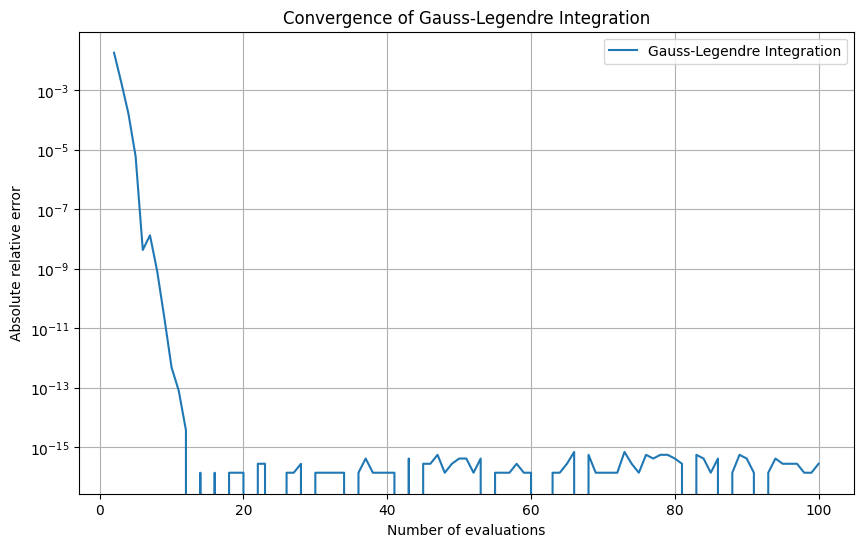

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(n_values + 1, errors_gauss_legendre, label='Gauss-Legendre Integration')
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Number of evaluations')
plt.ylabel('Absolute relative error')
plt.title('Convergence of Gauss-Legendre Integration')
plt.legend()
plt.grid(True)
plt.show()


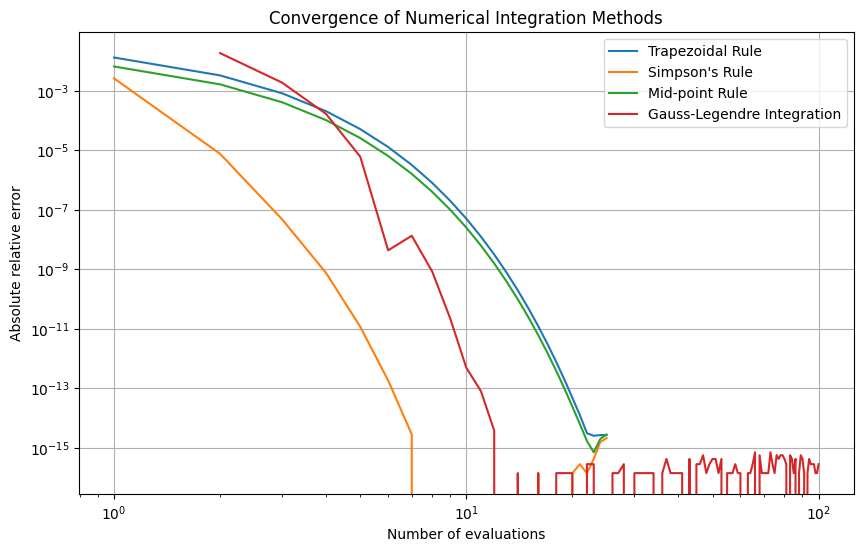

In [13]:
x = np.arange(1, 26)
plt.figure(figsize=(10, 6))
plt.plot(x, errors_trapezoidal, label='Trapezoidal Rule')
plt.plot(x, errors_simpson, label='Simpson\'s Rule')
plt.plot(x, errors_midpoint, label='Mid-point Rule')
plt.plot(n_values + 1, errors_gauss_legendre, label='Gauss-Legendre Integration')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of evaluations')
plt.ylabel('Absolute relative error')
plt.title('Convergence of Numerical Integration Methods')
plt.legend()
plt.grid(True)
plt.show()



## Wnioski

Jak mozna zaobserwować na wykresie błąd numeryczny zaczyna przewazać nad błędem metody dla liczby ewaluacji n trochę większym niz 10. Jest to punkt, w którym dalsze zwiększanie liczby ewaluacji funkcji podcałkowej nie przynosi już znaczącej poprawy w precyzji wyniku. W przypadku metody Gaussa-Legendre'a ten moment wydaje się być stosunkowo wcześnie, co wskazuje na skuteczność tej metody nawet dla niewielkiej liczby węzłów.

Po umieszczeniu Wartości błędów obliczonych za pomocą metody Gaussa-Legendre'a na wspólnym wykresie z z wynikami uzyskanymi dla innych metod całkowania (jak metoda prostokątów, trapezów i Simpsona) mozemy zauwazyc, ze błąd względny maleje najszybciej dla metody Simpsona a następnie dla metody Gaussa-Legendre'a, ale tez ich błędy numeryczne najszybciej zaczynają przewazac nad błędami metody.

## Bibliografia

prezentacja Quadratures - Marcin Kuta

https://home.agh.edu.pl/~funika/mownit/lab5/calkowanie.pdf
